# Workflow & Hyperparameter Optimization

In [55]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

🏠 Import the house price data set. We will keep only numerical features for the sake of simplicity

🎯 Your goal will be to fit the best KNN Regressor. In particular, how many "neighbors" (<font color=blue>K</font> in <font color=blue>K</font>NN) should you consider to get the best predictions for your house prices ?

In [2]:
# Load raw data
data = pd.read_csv('https://wagon-public-datasets.s3.amazonaws.com/houses_train_raw.csv', index_col="Id")

# Only keep numerical columns and raws without NaN
data = data.select_dtypes(include=np.number).dropna()

data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500


In [3]:
X = data.drop(columns=['SalePrice'])
y = data['SalePrice']

## 1. Train/Test split

❓ **Question (Holdout)**❓

👇 Split the dataset to create your `X_train` `X_test` and `y_train` `y_test`. Use:
- `test_size=0.3`
- `random_state=0` to compare your results with your buddy

In [5]:
# YOUR CODE HERE
X_train, X_test, y_train ,y_test=train_test_split(X,y,test_size=0.3, random_state=0 )

## 2. Scaling

⚖️ Scaling is always crucially important for the KNN algorithm..

❓ **Question (Scaling)** ❓ 

* Scale your train set and test set.
* Here, let's simply apply the `StandardScaler` and not waste time choosing one scaler per feature. Indeed, the goals of this exercise are to:
    * review KNN
    * understand GridSearchCV
    * understand RandomizedSearchCV

In [7]:
# YOUR CODE HERE
scaler=StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 3. Baseline KNN model

❓ **Question (A baseline for our KNN)** ❓

Cross-validate (*cv = 5*) a simple KNN regressor taking into account only _the closest neighbor_, and compute the average score over the 5 folds.

In [9]:
# YOUR CODE HERE
knn_regressor = KNeighborsRegressor(n_neighbors=1)

cv_scores = cross_val_score(knn_regressor, X_train_scaled, y_train, cv=5)

np.mean(cv_scores)

0.5601542887874071

## 4. GridSearch

### 4.1. A first GridSearch

❓ **Question (GridSearch v1)**❓

Let's use SKLearn `GridSearchCV` to find the best KNN hyperparameter `n_neighbors`.
- Start a coarse-grain approach, with `n_neighbors` = [1,5,10,20,50]
- 5-fold cross-validate each parameter
- Make sure to maximize your performance time using `n_jobs`

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

# Instantiate model
knn_regressor = KNeighborsRegressor()
# Hyperparameter Grid
param_grid = {'n_neighbors': [1, 5, 10, 20, 50]}


# Instantiate Grid Search
grid_search = GridSearchCV(knn_regressor, param_grid, cv=5, n_jobs=-1)
# Fit data to Grid Search
grid_search.fit(X_train_scaled, y_train)


GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 5, 10, 20, 50]})

❓ **Question (best parameters)** ❓

According to the GridSearch, what is the optimal K value?

##### YOUR CODE HERE
grid_search.best_params_

❓ **Question (scoring)** ❓ What is the best score the optimal K value produced?

In [11]:
# YOUR CODE HERE
grid_search.best_score_

0.7596697382171873

### 4.2. A second GridSearch

❓ **Question (GridSearch V2)** ❓


Now, we have an idea about where the best $K$ lies, but some of the values we didn't try could result in a  better performance.

* Re-run a GridSearch trying some values for $K$ around to your previous best value
* What are the `best_score` and `best_k` for this refined GridSearch?

In [40]:

# Instantiate model
knn_regresso = KNeighborsRegressor()
# Hyperparameter Grid
param_gri = {'n_neighbors': [5, 10, 15, 20,25]}


# Instantiate Grid Search
grid_searc = GridSearchCV(knn_regresso, param_gri, cv=5, n_jobs=-1)
# Fit data to Grid Search
grid_searc.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [5, 10, 15, 20, 25]})

In [42]:
grid_searc.best_params_

{'n_neighbors': 15}

In [39]:
grid_searc.best_score_

0.7657859104933367

In [53]:
best_score=0.7657859104933367
best_k=15

***🧪 Test your code***

In [54]:
from nbresult import ChallengeResult
result = ChallengeResult('knn',
                         best_k=best_k,
                         best_score=best_score)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/joud/.pyenv/versions/3.10.6/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /home/joud/code/joud-alharbi/data-workflow/tests
plugins: typeguard-2.13.3, anyio-3.6.2, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 2 items

test_knn.py::TestKnn::test_best_k PASSED                                 [ 50%]
test_knn.py::TestKnn::test_best_score PASSED                             [100%]

============================== 2 passed in 0.02s ===============================


💯 You can commit your code:

git add tests/knn.pickle

git commit -m 'Completed knn step'

git push origin master



### 4.3. Visual check (manual GridSearch)

☝️ This problem is actually simple enough to perform a GridSearch manually.

❓ **Question(Manual GridSearch)** ❓

- Loop manually over all values of $K$ from $1$ to $50$ and store the average of the cross-validated scores of each model in a list.
- Plot the scores as a function of $K$ to visually find the best $K$ using the `Elbow Method`

Text(0.5, 1.0, 'Cross-Validation Scores for Different K Values (KNN)')

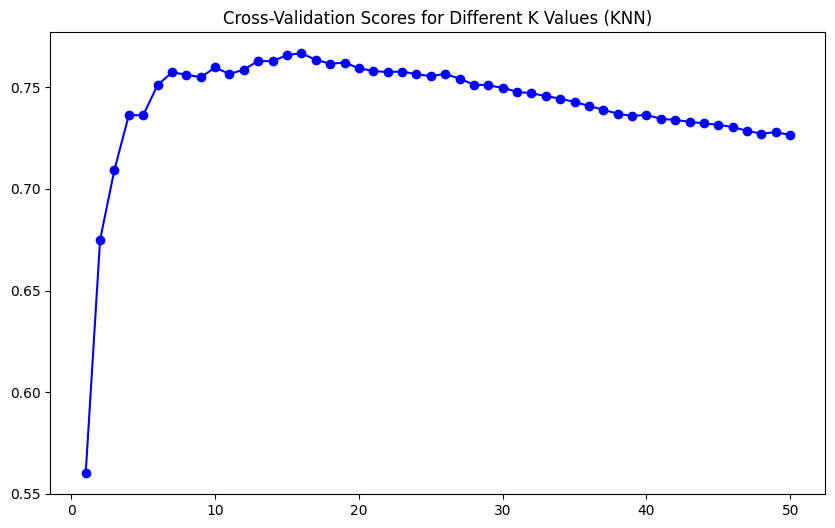

In [58]:
# YOUR CODE HERE


mean_cv_scores = []

for k in range(1, 51):
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    
    cv_scores = cross_val_score(knn_regressor, X_train_scaled, y_train, cv=5)
    mean_cv_scores.append(np.mean(cv_scores))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 51), mean_cv_scores, marker='o',  color='b')
plt.title('Cross-Validation Scores for Different K Values (KNN)')



❓Can you guess what makes GridSearchCV a better option than such manual loop ?


<details>
    <summary>Answer</summary>

- Sklearn's `n_jobs=-1` allows you to parallelize the search, utilizing all of your CPU cores
- What if you had multiple hyper-parameters to co-optimize?
</details>

## 5. GridSearch with multiple parameters

👩🏻‍🏫 KNNRegressor suppports various _distance metrics_ via the hyper-parameter `p` 

📚 [sklearn.neighbors.KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)

❓ **Question (tuning multiple parameters)** ❓


* Use GridSearchCV to search for the best $K$ and $p$ simultaneously.
    * Try all combinations for $K = [1, 5, 10, 20, 50]$ and $p = [1, 2, 3]$. 

In [72]:
# YOUR CODE HERE
knn_regressor = KNeighborsRegressor()

param_grid = {
    'n_neighbors': [1, 5, 10, 20, 50],
    'p': [1, 2, 3]
}

grid_search = GridSearchCV(knn_regressor, param_grid, cv=5, n_jobs=-1)

grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: n_neighbors={best_params['n_neighbors']}, p={best_params['p']}")
print(f"Best Cross-Validation Score: {best_score:.4f}")


Best parameters: n_neighbors=10, p=1
Best Cross-Validation Score: 0.7969


❓ **Question (number of submodels)**❓

How many submodels did you train overall?

<details>
    <summary>Hint</summary>

Much more than 15. Think twice :)
    <details>
    <summary>Answer</summary>

75 models due to CV=5
</details>

In [62]:
# YOUR CODE HERE
a=(5*3)*5
a

75

❓ **Question (best parameters and best score after tuning the model with multiple parameters)**❓

What are the *best parameters* and the *best score*?

In [64]:
# YOUR CODE HERE
best_parameters=10
best_Score= 0.7969

## 6. Random Search

Now let's see whether a RandomizedSearch can find a better combination with the same number of models being fitted.

❓ **Question (RandomizedSearchCV)** ❓

Use `RandomizedSearchCV` to
- Randomly sample $K$ from a uniform `scipy.stats.randint(1,50)` ([doc](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.randint.html)) distribution
- Sample $p$ from a list $[1,2,3]$
- Use the correct numbers of `n_iter` and `cv` to fit the exact same numbers of models as in your previous GridSearchCV.

In [73]:
# YOUR CODE HERE
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats

knn_regressor = KNeighborsRegressor()

param_distributions = {
    'n_neighbors': stats.randint(1, 50),
    'p': [1, 2, 3]
}

random_search = RandomizedSearchCV(
    knn_regressor,
    param_distributions,
    n_iter=15,
    cv=5,
    n_jobs=-1
)

random_search.fit(X_train_scaled, y_train)

best_params_random = random_search.best_params_
best_score_random = random_search.best_score_

print(f"Best parameters (RandomizedSearchCV): n_neighbors={best_params_random['n_neighbors']}, p={best_params_random['p']}")
print(f"Best Cross-Validation Score (RandomizedSearchCV): {best_score_random:.4f}")

Best parameters (RandomizedSearchCV): n_neighbors=2, p=1
Best Cross-Validation Score (RandomizedSearchCV): 0.7974


## 7. Generalization

❓ **Question (finetuning your model one more time)**❓

- Refine your RandomsearchCV if you want
- Choose your best model

In [71]:
# YOUR CODE HERE
knn_regressor = KNeighborsRegressor()

param_distributions = {
    'n_neighbors': stats.randint(1, 50),
    'p': [1, 5, 10]
}

random_search = RandomizedSearchCV(
    knn_regressor,
    param_distributions,
    n_iter=15,
    cv=5,
    n_jobs=-1
)

random_search.fit(X_train_scaled, y_train)

best_params_random = random_search.best_params_
best_score_random = random_search.best_score_

print(f"Best parameters (RandomizedSearchCV): n_neighbors={best_params_random['n_neighbors']}, p={best_params_random['p']}")
print(f"Best Cross-Validation Score (RandomizedSearchCV): {best_score_random:.4f}")


Best parameters (RandomizedSearchCV): n_neighbors=8, p=1
Best Cross-Validation Score (RandomizedSearchCV): 0.7942


Now try to display your `cv_results` as a `DataFrame`, this will help you visualize what's going on inside the CV! 😉

In [74]:
# YOUR CODE HERE
cv_results_df = pd.DataFrame(random_search.cv_results_)
cv_results_df 

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001073,0.000212,0.005573,0.000506,8,1,"{'n_neighbors': 8, 'p': 1}",0.750651,0.825437,0.742715,0.866525,0.785850,0.794236,0.046527,2
1,0.001122,0.000256,0.004578,0.000359,2,1,"{'n_neighbors': 2, 'p': 1}",0.710323,0.793197,0.776805,0.858920,0.847909,0.797431,0.053591,1
2,0.001470,0.000230,0.003901,0.000898,24,2,"{'n_neighbors': 24, 'p': 2}",0.740016,0.814477,0.695182,0.806174,0.725816,0.756333,0.046480,7
3,0.001305,0.000181,0.003788,0.000155,43,2,"{'n_neighbors': 43, 'p': 2}",0.732335,0.787417,0.685419,0.763922,0.695584,0.732935,0.038940,11
4,0.001479,0.000340,0.007628,0.000611,25,1,"{'n_neighbors': 25, 'p': 1}",0.769800,0.807158,0.723375,0.818164,0.760461,0.775792,0.034052,3
5,0.001758,0.000371,0.004994,0.000338,36,2,"{'n_neighbors': 36, 'p': 2}",0.733587,0.790687,0.689146,0.779746,0.710599,0.740753,0.039084,10
6,0.001867,0.000274,0.190434,0.006019,34,3,"{'n_neighbors': 34, 'p': 3}",0.707884,0.777660,0.664898,0.752352,0.668263,0.714212,0.044863,13
7,0.002007,0.000497,0.199709,0.037640,2,3,"{'n_neighbors': 2, 'p': 3}",0.631907,0.700492,0.638001,0.806689,0.535899,0.662598,0.089216,15
8,0.002487,0.001563,0.004759,0.000954,10,2,"{'n_neighbors': 10, 'p': 2}",0.728972,0.797007,0.720581,0.836532,0.715257,0.759670,0.048466,6
9,0.002704,0.000678,0.007964,0.002366,30,2,"{'n_neighbors': 30, 'p': 2}",0.737478,0.800830,0.697597,0.786169,0.726074,0.749629,0.038384,9


❓ **Question (Evaluation of the "best" model)** ❓

* Time has come to discover our model's performance with "best params" on the **unseen** test set `X_test`.
    * Compute the r2 score for the test set and save it as `r2_test`.

In [75]:
# YOUR CODE HERE
from sklearn.metrics import r2_score

# Instantiate the KNN regressor with the best parameters found
best_knn_regressor = KNeighborsRegressor(
    n_neighbors=random_search.best_params_['n_neighbors'],
    p=random_search.best_params_['p']
)

# Train the final model on the scaled training data
best_knn_regressor.fit(X_train_scaled, y_train)

# Predict on the scaled test set
y_test_pred = best_knn_regressor.predict(X_test_scaled)

# Compute the R^2 score for the test set
r2_test = r2_score(y_test, y_test_pred)

print(f"R^2 Score on Test Set: {r2_test:.4f}")


R^2 Score on Test Set: 0.7457


❓ **Question (Taking a step back)** ❓

Would you consider the optimized model to generalize well?

<details><summary>Answer</summary>

Test score may decrease a bit with train set. Probably not more than 5%. This can be due to
- A non-representative train/test split
- A cross-val number too small leading to overfitting the model-tuning phase. The more you cross-validated, the more robust your findings will generalize - but you can't increase cv too much if your dataset is too small as you won't keep enough observations in each fold to be representative.
- Our dataset is very small and our hyperparameter optimization is thus extremely dependent (and overfitting) on our train/test split. Always make sure your dataset is much bigger than the total number of hyperparameter combinations you are trying out!
    
</details>

***🧪 Test your code***

In [76]:
from nbresult import ChallengeResult
result = ChallengeResult('r2', 
                         r2_test=r2_test)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/joud/.pyenv/versions/3.10.6/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /home/joud/code/joud-alharbi/data-workflow/tests
plugins: typeguard-2.13.3, anyio-3.6.2, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 1 item

test_r2.py::TestR2::test_r2 PASSED                                       [100%]

============================== 1 passed in 0.16s ===============================


💯 You can commit your code:

git add tests/r2.pickle

git commit -m 'Completed r2 step'

git push origin master



🏁 Congratulations! Now, you know how to finetune a model using either a GridSearchCV or a RandomizedSearchCV 

💾 Don't forget to `git add/commit/push` your notebook...

🚀 ... and move on to the next challenge!